<a href="https://colab.research.google.com/github/Misael-Rodrigues/ML_Identificador_de_Fraude/blob/main/Analise_Campanha_Movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o nosso data set e eliminando as colunas que não serão consideradas nessa análise. Utilizaremos como norteadores os dados demográficos.

In [ ]:
import pandas as pd

# Lendo o arquivo CSV
df = pd.read_csv('/content/Banco-de-Dados_2023.csv')

# Excluindo as colunas que não serão usadas
colunas_para_excluir = [
    'E o seu estado civil?',
    'Você tem filho(s)?',
    'Você já participou de algum outro evento online sobre Milhas?',
    'Qual seu nível de conhecimento sobre Milhas?',
    'Me responda agora o que são Milhas Aéreas para você?',
    'Atualmente você possui cartão de crédito?',
    'Essa pergunta é opcional e pessoal, beleza? \n\nEu quero que você seja brutalmente sincero comigo na resposta desta pergunta: \n\n"Qual o seu sonho HOJE? E no que essa nova fonte de renda de R$ 36.000 por ano te ajudaria a chegar lá?"',
    'Submit Date (UTC)'
]

df = df.drop(columns=colunas_para_excluir)

# Exibindo as primeiras linhas do DataFrame
df.head()



,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?"
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.


# Em seguida, partimos para identificar quais são as principais dores e desejos de homens e mulheres, baseado no número de respostas.

In [ ]:

# Filtro do DataFrame para homens e mulheres
homens_df = df[df['Qual o seu sexo?'] == 'Masculino']
mulheres_df = df[df['Qual o seu sexo?'] == 'Feminino']

# Principais dores dos homens
dores_homens = homens_df['E o que te impede de atingir esses objetivos?'].value_counts().head()

# principais dores das mulheres
dores_mulheres = mulheres_df['E o que te impede de atingir esses objetivos?'].value_counts().head()

# Obtendo os principais desejos dos homens
desejos_homens = homens_df['Me conta aí: quais são os seus objetivos atualmente?'].value_counts().head()

# Obtendo os principais desejos das mulheres
desejos_mulheres = mulheres_df['Me conta aí: quais são os seus objetivos atualmente?'].value_counts().head()

# Imprimindo os resultados
print("Principais dores dos homens:")
print(dores_homens)
print("\nPrincipais dores das mulheres:")
print(dores_mulheres)
print("\nPrincipais desejos dos homens:")
print(desejos_homens)
print("\nPrincipais desejos das mulheres:")
print(desejos_mulheres)


Principais dores dos homens:
E o que te impede de atingir esses objetivos?
Falta de conhecimento    771
Conhecimento             762
Dinheiro                 584
Nada                     360
Tempo                    294
Name: count, dtype: int64

Principais dores das mulheres:
E o que te impede de atingir esses objetivos?
Dinheiro                 192
Falta de conhecimento    147
Falta de dinheiro        128
Conhecimento              84
Nada                      39
Name: count, dtype: int64

Principais desejos dos homens:
Me conta aí: quais são os seus objetivos atualmente?
Renda extra                 513
Viajar                      418
Ganhar dinheiro             199
Liberdade financeira        161
Independência financeira    126
Name: count, dtype: int64

Principais desejos das mulheres:
Me conta aí: quais são os seus objetivos atualmente?
Viajar                 121
Renda extra             71
Ganhar dinheiro         31
Ter uma renda extra     24
Viagens                 22
Name: count,

# Dando continuidade, inserimos essas informações em gráficos para que o dado pudesse ser melhor visualizado. Desse modo, é possível compreender rapidamente as top 5 dores e desejos do leads.

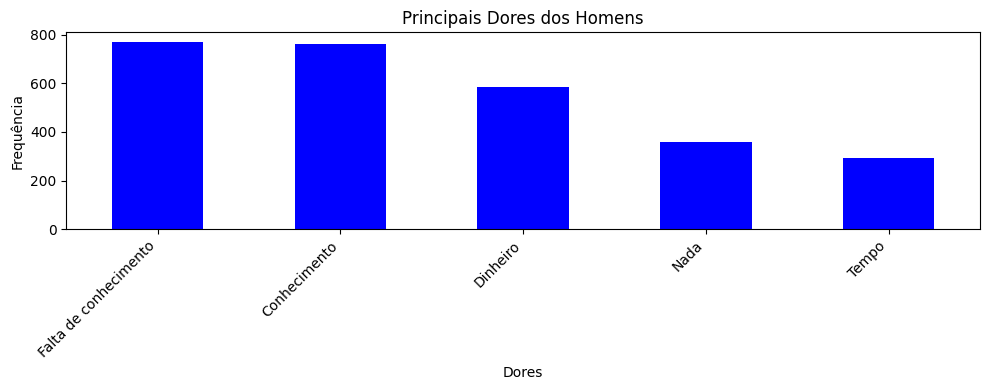

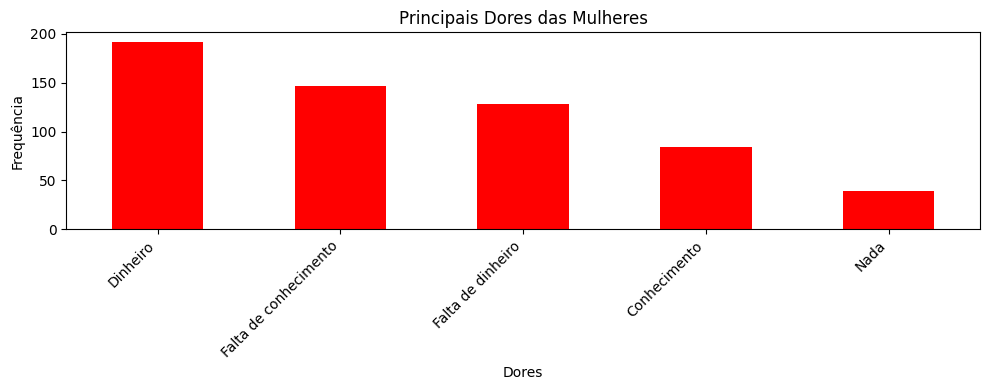

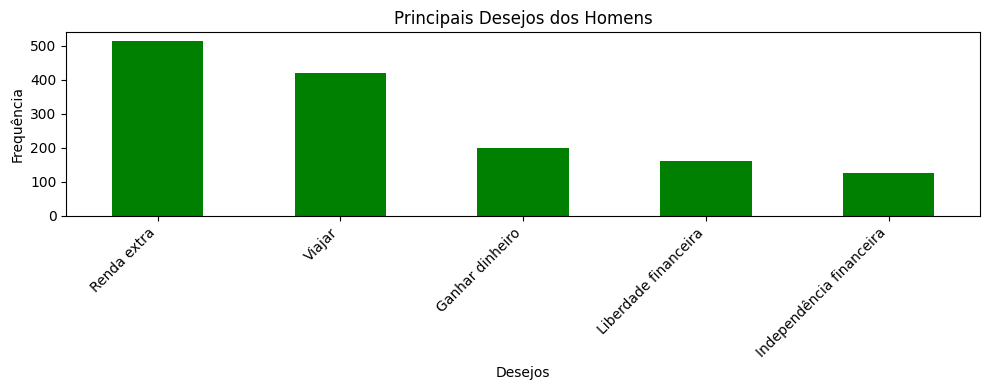

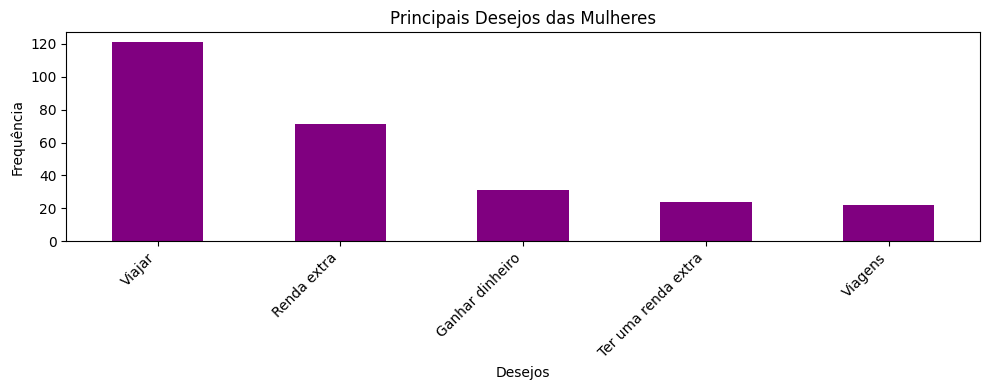

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotando as principais dores dos homens
plt.figure(figsize=(10, 4))
dores_homens.plot(kind='bar', color='blue')
plt.title('Principais Dores dos Homens')
plt.xlabel('Dores')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotando as principais dores das mulheres
plt.figure(figsize=(10, 4))
dores_mulheres.plot(kind='bar', color='red')
plt.title('Principais Dores das Mulheres')
plt.xlabel('Dores')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotando os principais desejos dos homens
plt.figure(figsize=(10, 4))
desejos_homens.plot(kind='bar', color='green')
plt.title('Principais Desejos dos Homens')
plt.xlabel('Desejos')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotando os principais desejos das mulheres
plt.figure(figsize=(10, 4))
desejos_mulheres.plot(kind='bar', color='purple')
plt.title('Principais Desejos das Mulheres')
plt.xlabel('Desejos')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Buscando compreender mais os potenciais perfis, realizamos algumas seguimentações de dados, baseadas em faixa etária, gasto mensal e interesse. Para melhor compreensão dos dados, realizamos a inserção de gráficos para tornar nossa analise mais visual. Por fim, adotamos o principio de Pareto com foco no 80/20 para potencializar nossa acertividade.

In [ ]:
# Contando as ocorrências por faixa etária.
contagem_idades = df['Qual é a sua idade?'].value_counts()
print(contagem_idades)


Qual é a sua idade?
De 35 a 44 anos      5658
De 25 a 34 anos      4624
De 45 a 54 anos      3657
Mais de 55 anos      2124
De 18 a 24 anos       801
Menos que 18 anos      93
Name: count, dtype: int64


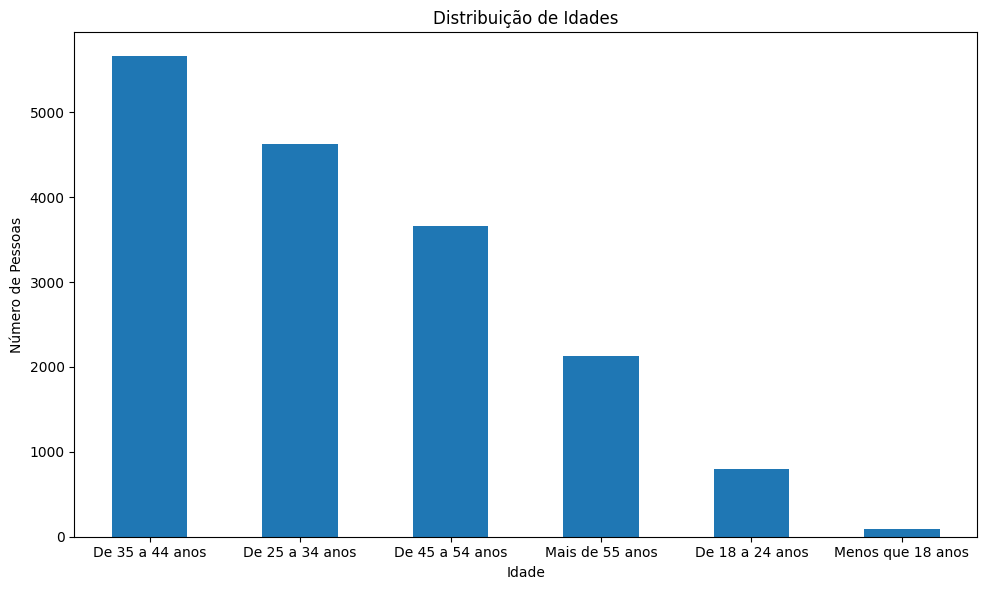

In [ ]:
# prompt: Plot um gráfico com essas informações organizado do maior para o menor.

import matplotlib.pyplot as plt

# Contando as ocorrências de cada idade
contagem_idades = df['Qual é a sua idade?'].value_counts()

# Ordenando as idades do maior para o menor
contagem_idades_ordenadas = contagem_idades.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_idades_ordenadas.plot(kind='bar')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


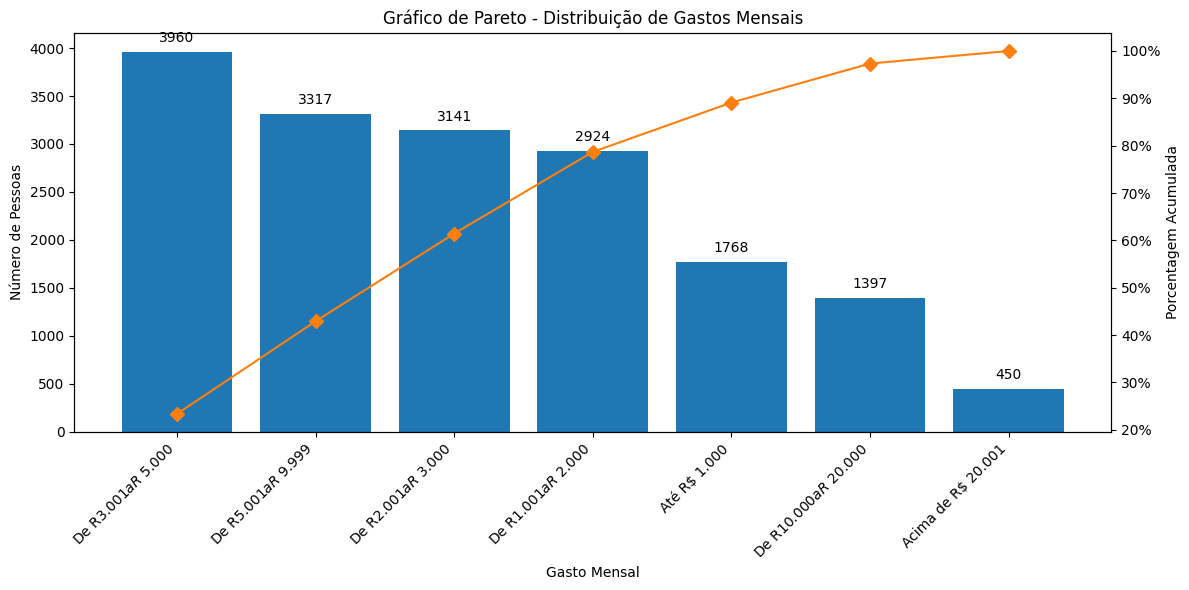

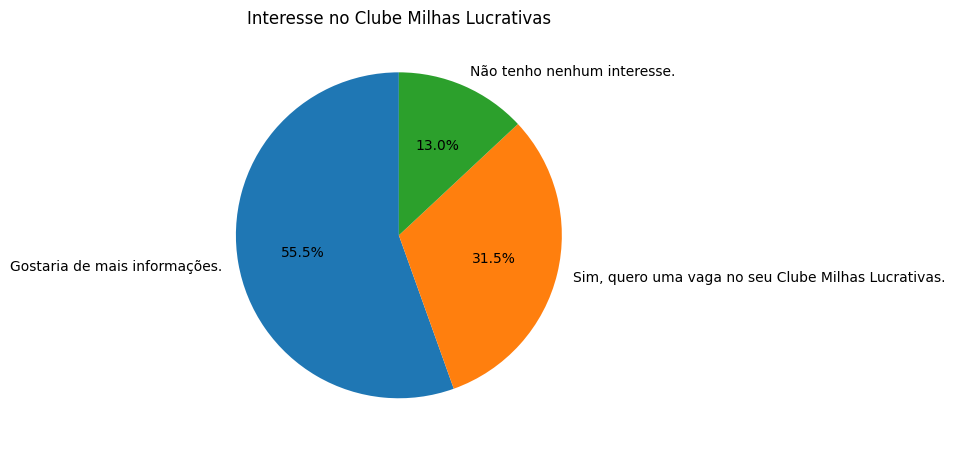

In [ ]:
# prompt: Faça a mesma distribuição para "Quanto você GASTA em média por mês?" e "Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?"

# Distribuição de gastos mensais
contagem_gastos = df['Quanto você GASTA em média por mês?'].value_counts()
contagem_gastos_ordenadas = contagem_gastos.sort_values(ascending=False)

# Calculando a porcentagem acumulada
contagem_gastos_ordenadas_percentual = contagem_gastos_ordenadas.cumsum() / contagem_gastos_ordenadas.sum()

# Criando o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras
ax1.bar(contagem_gastos_ordenadas.index, contagem_gastos_ordenadas.values, color="C0")
ax1.set_xlabel('Gasto Mensal')
ax1.set_ylabel('Número de Pessoas')
ax1.tick_params(axis='y')
plt.xticks(rotation=45, ha='right')

# Adicionando as legendas de valores dentro das barras
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Linha da porcentagem acumulada
ax2 = ax1.twinx()
ax2.plot(contagem_gastos_ordenadas.index, contagem_gastos_ordenadas_percentual.values, color="C1", marker="D", ms=7)

# Import the necessary module
from matplotlib.ticker import PercentFormatter

ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # Now you can use PercentFormatter
ax2.set_ylabel('Porcentagem Acumulada')
ax2.tick_params(axis='y')

plt.title('Gráfico de Pareto - Distribuição de Gastos Mensais')
fig.tight_layout()
plt.show()

# Distribuição de interesse no Clube Milhas Lucrativas
contagem_interesse = df['Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?'].value_counts()

plt.figure(figsize=(8, 6))
contagem_interesse.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Interesse no Clube Milhas Lucrativas')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.tight_layout()
plt.show()



# Iniciamos a partir daqui a criação do nosso "Lead Score" baseada em 4 premissas: Limite de Cartão,	Renda	Mensal, Gasto Mensal e Interesse. Para cada categoria atribuimos notas que variam de 1 a 8 (exceto no caso do interesse que varia de 1 a 10, sendo 1 nenhum interesse, 5 interesse em saber mais e 10 total interesse). Baseado nessa estimativa, é somado todos os indicadores e apontado o Lead Score na respectiva coluna.

In [ ]:
# Função para classificar o limite do cartão de crédito
def classificar_limite_cartao(row):
    if row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'Não tenho cartão de crédito.':
        return 1
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'Até R$ 1.600 de limite.':
        return 2
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'De R$ 1.601 a R$ 3.000 de limite':
        return 3
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'De R$ 3.000 a R$ 5.000 de limite':
        return 4
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'De R$ 5.000 a R$ 10.000 de limite':
        return 5
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'De R$ 10.000 a R$ 20.000 de limite':
        return 6
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'De R$ 5.000 a R$ 10.000 de limite':
        return 7
    elif row['Qual o limite que você possui somando todos os seus cartões de crédito?'] == 'Mais de R$ 20.000 de limite':
        return 8
    else:
        return 0  # Caso não se enquadre em nenhuma das opções

# Aplicar a função para criar a nova coluna 'target'
df['Limite'] = df.apply(classificar_limite_cartao, axis=1)

# Mostrar o DataFrame resultante
df.head()

,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Limite
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.,5
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.,3
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.,5
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.,5
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.,8


In [ ]:
# Função para classificar a renda mensal
def classificar_renda_mensal(row):
    if row['Quanto você ganha em média por mês?'] == 'Não tenho renda! Estou desempregado(a) neste momento.':
        return 1
    elif row['Quanto você ganha em média por mês?'] == 'Até R$1000,00':
        return 2
    elif row['Quanto você ganha em média por mês?'] == 'De R$1001 a R$2000':
        return 3
    elif row['Quanto você ganha em média por mês?'] == 'De R$2001 a R$3000':
        return 4
    elif row['Quanto você ganha em média por mês?'] == 'De R$3001 a R$5000':
        return 5
    elif row['Quanto você ganha em média por mês?'] == 'De R$5001 a R$9.999':
        return 6
    elif row['Quanto você ganha em média por mês?'] == 'De R$10.000 a R$20.000':
        return 7
    elif row['Quanto você ganha em média por mês?'] == 'Acima de R$20.001':
        return 8
    else:
        return 0  # Caso não se enquadre em nenhuma das opções

# Aplicar a função para criar a nova coluna 'Renda'
df['Renda'] = df.apply(classificar_renda_mensal, axis=1)

# Mostrar o DataFrame resultante
df.head()

,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Limite,Renda
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.,5,4
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.,3,3
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.,5,2
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.,5,5
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.,8,7


In [ ]:
# Função para classificar o gasto mensal com os novos parâmetros
def classificar_gasto_mensal(row):
    if row['Quanto você GASTA em média por mês?'] == 'Até R$ 1.000':
        return 1
    elif row['Quanto você GASTA em média por mês?'] == 'De R$ 1.001 a R$ 2.000':
        return 2
    elif row['Quanto você GASTA em média por mês?'] == 'De R$ 2.001 a R$ 3.000':
        return 3
    elif row['Quanto você GASTA em média por mês?'] == 'De R$ 3.001 a R$ 5.000':
        return 4
    elif row['Quanto você GASTA em média por mês?'] == 'De R$ 5.001 a R$ 9.999':
        return 5
    elif row['Quanto você GASTA em média por mês?'] == 'De R$ 10.000 a R$ 20.000':
        return 6
    elif row['Quanto você GASTA em média por mês?'] == 'Acima de R$ 20.001':
        return 7
    else:
        return 0  # Caso não se enquadre em nenhuma das opções

# Aplicar a função para criar a nova coluna 'Gasto'
df['Gasto'] = df.apply(classificar_gasto_mensal, axis=1)

# Mostrar o DataFrame resultante
df.head()



,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Limite,Renda,Gasto
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.,5,4,2
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.,3,3,1
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.,5,2,2
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.,5,5,4
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.,8,7,5


In [ ]:
# Função para classificar o interesse no Clube Milhas Lucrativas
def classificar_interesse_clube(row):
    if row['Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?'] == 'Não tenho nenhum interesse.':
        return 1
    elif row['Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?'] == 'Gostaria de mais informações.':
        return 5
    elif row['Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?'] == 'Sim, quero uma vaga no seu Clube Milhas Lucrativas.':
        return 10
    else:
        return 0  # Caso não se enquadre em nenhuma das opções

# Aplicar a função para criar a nova coluna 'Interesse_Clube'
df['Interesse_Clube'] = df.apply(classificar_interesse_clube, axis=1)

# Mostrar o DataFrame resultante
df.head()


,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Limite,Renda,Gasto,Interesse_Clube
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.,5,4,2,1
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.,3,3,1,1
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.,5,2,2,5
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.,5,5,4,5
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.,8,7,5,5


In [ ]:
# Criar a coluna 'Lead Score' como a soma das colunas 'Limite', 'Renda', 'Gasto' e 'Interesse_Clube'
df['Lead Score'] = df[['Limite', 'Renda', 'Gasto', 'Interesse_Clube']].sum(axis=1)

# Mostrar o DataFrame resultante
df.head()


,ID,Qual é a sua idade?,Qual o seu sexo?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Limite,Renda,Gasto,Interesse_Clube,Lead Score
0,1,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,Não tenho nenhum interesse.,5,4,2,1,12
1,2,De 25 a 34 anos,Masculino,De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Não tenho nenhum interesse.,3,3,1,1,8
2,3,De 18 a 24 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Gostaria de mais informações.,5,2,2,5,14
3,4,De 45 a 54 anos,Feminino,De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,Gostaria de mais informações.,5,5,4,5,19
4,5,De 35 a 44 anos,Masculino,Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...",Gostaria de mais informações.,8,7,5,5,25


# Após criado o nosso Lead Score, chegou a hora de averiguar quem possui maior chance, dado o indicador de ser um possível aluno do metodo de milhas. Plotamos um gráfico que nos retorna os maiores pontuadores por faixa etária.

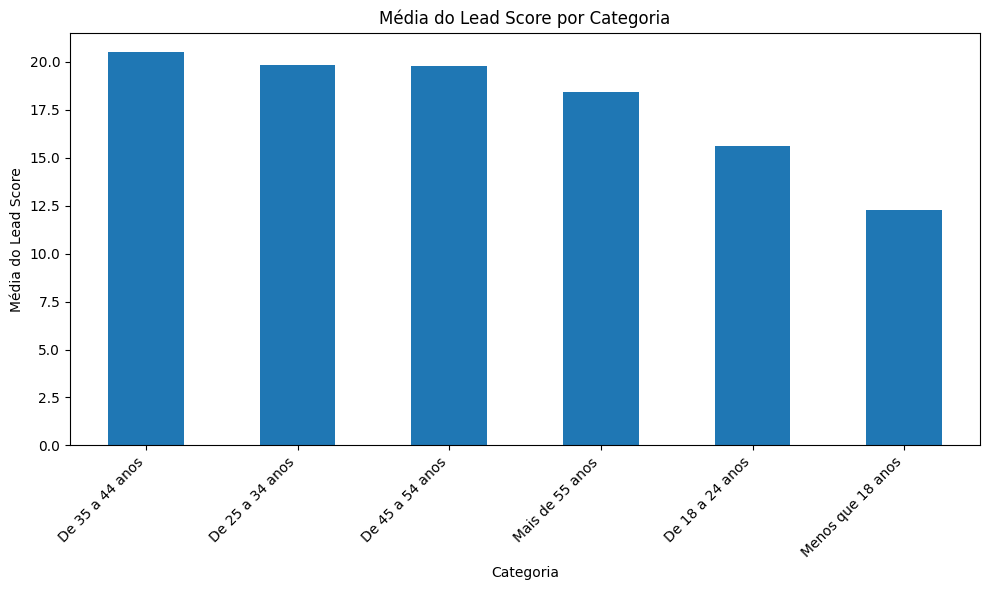

In [ ]:

media_lead_score_por_categoria = df.groupby('Qual é a sua idade?')['Lead Score'].mean().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
media_lead_score_por_categoria.plot(kind='bar')
plt.title('Média do Lead Score por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média do Lead Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Por fim, chegamos a fase do calculo da conversão geral. Para isso criamos um dataframe com as porcentagens de conversão de cada categoria e realizamos a média geral de conversão, isso assumindo que para a regra de negócio todas as categorias possuem a mesma importância, ou seja, o mesmo peso.

In [ ]:
# Dados da conversão
conversao = {
    'Limite': [0.12, 0.20, 0.21, 0.54, 0.83, 1.39, 2.40],
    'Renda': [0.32, 0.77, 0.98, 1.91, 2.09, 2.91, 1.50],
    'Gasto': [0.22, 0.56, 0.75, 1.23, 1.99, 2.13, 3.65]
}

# DataFrame
df = pd.DataFrame(conversao)

# Calculando a média para cada categoria
average_limite = df['Limite'].mean()
average_renda = df['Renda'].mean()
average_gasto = df['Gasto'].mean()

# Calculando a média geral
average_general = (average_limite + average_renda + average_gasto) / 3

# Adicionando a média geral ao DataFrame
df.loc['Média'] = [average_limite, average_renda, average_gasto]

# Imprimindo as taxas de conversão formatadas
print("Limite no Cartão\t% Conversão")
limite_labels = [
    "Não tem cartão", "Até 1.600 limite", "De 1.600 a 3.000",
    "De 3.000 a 5.000", "De 5.000 a 10.000", "De 10.000 a 20.000",
    "Mais de 20.000", "Média"
]
for label, value in zip(limite_labels, df['Limite']):
    print(f"{label}\t{value:.2f}%")

print("\nFaixa de Renda\t% Conversão")
renda_labels = [
    "Até 2.000", "2.000 a 3.000", "3.000 a 5.000",
    "5.000 a 10.000", "10.000 a 20.000", "Acima de 20.000", "Média"
]
for label, value in zip(renda_labels, df['Renda']):
    print(f"{label}\t{value:.2f}%")

print("\nGasto Mensal\t% Conversão")
gasto_labels = [
    "Até 1.000", "De 1.000 a 2.000", "De 2.000 a 3.000",
    "De 3.000 a 5.000", "De 5.000 a 9.999", "De 10.000 a 20.000",
    "Acima de 20.000", "Média"
]
for label, value in zip(gasto_labels, df['Gasto']):
    print(f"{label}\t{value:.2f}%")

print("\nMédia Geral\t% Conversão")
print(f"{average_general:.2f}%")


Limite no Cartão	% Conversão
Não tem cartão	0.12%
Até 1.600 limite	0.20%
De 1.600 a 3.000	0.21%
De 3.000 a 5.000	0.54%
De 5.000 a 10.000	0.83%
De 10.000 a 20.000	1.39%
Mais de 20.000	2.40%
Média	0.81%

Faixa de Renda	% Conversão
Até 2.000	0.32%
2.000 a 3.000	0.77%
3.000 a 5.000	0.98%
5.000 a 10.000	1.91%
10.000 a 20.000	2.09%
Acima de 20.000	2.91%
Média	1.50%

Gasto Mensal	% Conversão
Até 1.000	0.22%
De 1.000 a 2.000	0.56%
De 2.000 a 3.000	0.75%
De 3.000 a 5.000	1.23%
De 5.000 a 9.999	1.99%
De 10.000 a 20.000	2.13%
Acima de 20.000	3.65%
Média	1.50%

Média Geral	% Conversão
1.27%
